In [1]:
from tkinter import *
from PIL import Image,ImageTk
from tkinter import filedialog
import pydicom
import matplotlib.pyplot as plt
import easygui
import numpy as np
import cv2

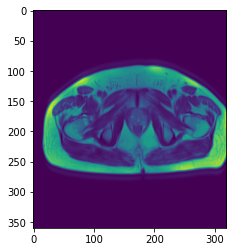

In [26]:
filepath = easygui.fileopenbox("Seleccione la imagen a reportar","MENU")
full_dicom = pydicom.dcmread(filepath)
img = full_dicom.pixel_array
img = (img/img.max())*255
plt.imshow(img)
ima_r = cv2.resize(img,(675,int(675)))

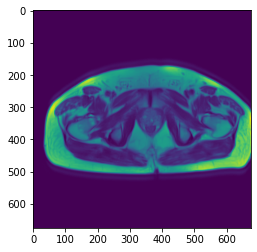

In [27]:
plt.imshow(ima_r)

In [35]:
im1 = ima_r[0:300,100:200]

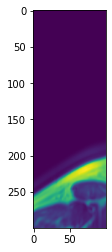

In [36]:
plt.imshow(im1)

In [25]:
from skimage.filters.rank import gradient
from skimage.morphology import disk
gradient_img = gradient(img, disk(1))
plt.imshow(gradient_img)

C:\Users\Pier\AppData\Local\Temp/ipykernel_12884/2878693866.py:3: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  gradient_img = gradient(img, disk(1))


ValueError: Images of type float must be between -1 and 1.